In [1]:
import pandas as pd 
taxi = pd.read_csv("2_taxi_nyc.csv")

In [2]:
# to see number or rows and columns in dataframe
taxi.shape

(29101, 14)

In [3]:
# to see types of attributes
taxi.dtypes

pickup_dt        object
pickup_month     object
borough          object
pickups           int64
hday             object
spd             float64
vsb             float64
temp            float64
dewp            float64
slp             float64
pcp 01          float64
pcp 06          float64
pcp 24          float64
sd              float64
dtype: object

In [4]:
# to see first 5 rows in dataframe
taxi.head()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp 01,pcp 06,pcp 24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [5]:
# to rename a column 
taxi = taxi.rename(columns={'pcp 01': 'pcp_01', 'pcp 06':'pcp_06', 'pcp 24': 'pcp_24'})

In [6]:
taxi.head()

,pickup_dt,pickup_month,borough,pickups,hday,spd,vsb,temp,dewp,slp,pcp_01,pcp_06,pcp_24,sd
0,2015-01-01 01:00:00,Jan,Bronx,152,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
1,2015-01-01 01:00:00,Jan,Brooklyn,1519,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2,2015-01-01 01:00:00,Jan,EWR,0,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
3,2015-01-01 01:00:00,Jan,Manhattan,5258,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
4,2015-01-01 01:00:00,Jan,Queens,405,Y,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0


In [8]:
#to count number of rows grouped by borough
taxi['borough'].value_counts()

Brooklyn         4343
Staten Island    4343
Manhattan        4343
Bronx            4343
Queens           4343
EWR              4343
Name: borough, dtype: int64

In [9]:
# to sum up all pickups
taxi['pickups'].sum()

14265773

In [10]:
# from which borough were the max number of pickups?
taxi.groupby('borough').agg({'pickups': 'sum'}).sort_values('pickups')

,pickups
borough,
EWR,105
Staten Island,6957
Bronx,220047
Queens,1343528
Brooklyn,2321035
Manhattan,10367841


In [11]:
new_df = taxi.groupby('borough', as_index=False).agg({'pickups': 'sum'})


In [12]:
new_df

,borough,pickups
0,Bronx,220047
1,Brooklyn,2321035
2,EWR,105
3,Manhattan,10367841
4,Queens,1343528
5,Staten Island,6957


In [13]:
min_pickups = new_df.iloc[[new_df['pickups'].idxmin()]]['borough']

In [14]:
min_pickups

2    EWR
Name: borough, dtype: object

Сгруппируйте данные по двум признакам: району города и является ли день выходным (колонки borough и hday). Сравните среднее число поездок, и выберите районы, из которых по праздникам в среднем поступает больше заказов, чем в обычные дни. 


In [15]:
taxi.groupby(['borough','hday'], as_index = False).agg({'pickups': 'mean'})

,borough,hday,pickups
0,Bronx,N,50.771073
1,Bronx,Y,48.065868
2,Brooklyn,N,534.727969
3,Brooklyn,Y,527.011976
4,EWR,N,0.023467
5,EWR,Y,0.041916
6,Manhattan,N,2401.302921
7,Manhattan,Y,2035.928144
8,Queens,N,308.899904
9,Queens,Y,320.730539


Для каждого района посчитайте число поездок по месяцам. Отсортируйте полученные значения по убыванию и сохраните результирующий датафрейм в pickups_by_mon_bor.
pickup_month, borough, pickups.

In [16]:
pickups_by_mon_bor = taxi.groupby(['pickup_month', 'borough'], as_index = False) \
.agg({'pickups': 'sum'}) \
.sort_values('pickups', ascending = False)

In [17]:
pickups_by_mon_bor

,pickup_month,borough,pickups
21,Jun,Manhattan,1995388
33,May,Manhattan,1888800
9,Feb,Manhattan,1718571
27,Mar,Manhattan,1661261
3,Apr,Manhattan,1648278
15,Jan,Manhattan,1455543
19,Jun,Brooklyn,482466
31,May,Brooklyn,476087
1,Apr,Brooklyn,378095
25,Mar,Brooklyn,346726


In [21]:
 def temp_to_celcius(a) :
        return ((a - 32) * 5) / 9

In [22]:
taxi['temp'][:5]

0    30.0
1    30.0
2    30.0
3    30.0
4    30.0
Name: temp, dtype: float64

In [23]:
taxi['temp_C'] = temp_to_celcius(taxi['temp'])
taxi['temp_C'][:5]

0   -1.111111
1   -1.111111
2   -1.111111
3   -1.111111
4   -1.111111
Name: temp_C, dtype: float64

 Напишите функцию read_n_agg, которая:

принимает на вход один параметр – путь к файлу
при помощи переданного пути, считывает файл, в котором разделителем является ;
считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
возвращает результат этих действий (агрегированный датафрэйм)

In [25]:
df = pd.read_csv("3_companies.csv", sep = ';')

In [26]:
df.head()

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


In [27]:
def read_n_agg(path):
    df = pd.read_csv(path, sep =';')
    return df.groupby('company', as_index=True).agg({'income' : 'mean'})

In [43]:
taxi = pd.read_csv("3_taxi_peru.csv", sep = ';', parse_dates = ['start_at', 'end_at', 'arrived_at'])

In [44]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [45]:
9741/23111

0.4214876033057851

In [46]:
import seaborn as sns

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


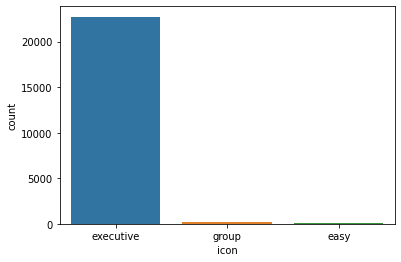

In [47]:
# first steps in seaborn
sns.countplot(taxi.icon)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


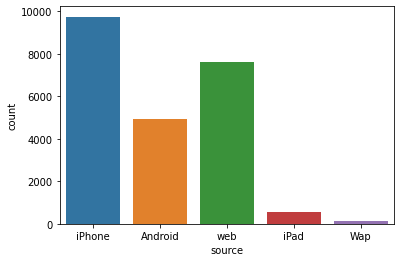

In [48]:
sns.countplot(taxi.source)

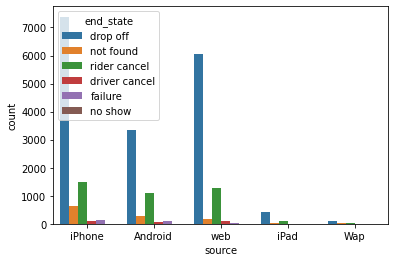

In [49]:
sns.countplot(x = taxi['source'], hue = taxi['end_state'], data = taxi)

In [50]:
import matplotlib.pyplot as plt

In [52]:
driver_score_counts = taxi.driver_score.value_counts(normalize = True).mul(100).round(2)\
.reset_index()

In [53]:
driver_score_counts = driver_score_counts.rename(columns = {'index':'Driver_score', 'driver_score':'percentage'})
driver_score_counts = driver_score_counts.sort_values('Driver_score')

In [57]:
driver_score_counts.head()

,Driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88


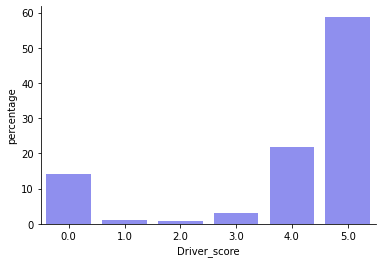

In [59]:
ax = sns.barplot(x='Driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver_score', ylabel='percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [60]:
rider_score_counts = taxi.rider_score.value_counts(normalize = True).mul(100).round(2)\
.reset_index()
rider_score_counts = rider_score_counts.rename(columns = {'index':'rider_score', 'rider_score':'percentage'})
rider_score_counts = rider_score_counts.sort_values('rider_score')

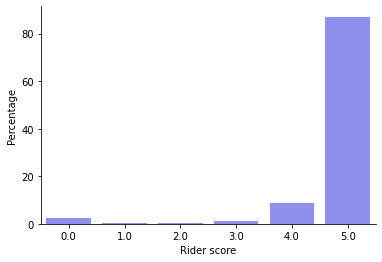

In [61]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()